In [21]:
import pandas as pd

resenha = pd.read_csv('imdb-reviews-pt-br.csv')
resenha

id                                            text_en  \
0          1  Once again Mr. Costner has dragged out a movie...   
1          2  This is an example of why the majority of acti...   
2          3  First of all I hate those moronic rappers, who...   
3          4  Not even the Beatles could write songs everyon...   
4          5  Brass pictures movies is not a fitting word fo...   
...      ...                                                ...   
49454  49456  Seeing as the vote average was pretty low, and...   
49455  49457  The plot had some wretched, unbelievable twist...   
49456  49458  I am amazed at how this movieand most others h...   
49457  49459  A Christmas Together actually came before my t...   
49458  49460  Working-class romantic drama from director Mar...   

                                                 text_pt sentiment  
0      Mais uma vez, o Sr. Costner arrumou um filme p...       neg  
1      Este é um exemplo do motivo pelo qual a maiori...       neg  
2      Primeiro de tudo eu odeio esses raps imbecis, ...       neg  
3      Nem mesmo os Beatles puderam escrever músicas ...       neg  
4      Filmes de fotos de latão não é uma palavra apr...       neg  
...                                                  ...       ...  
49454  Como a média de votos era muito baixa, e o fat...       pos  
49455  O enredo teve algumas reviravoltas infelizes e...       pos  
49456  Estou espantado com a forma como este filme e ...       pos  
49457  A Christmas Together realmente veio antes do m...       pos  
49458  O drama romântico da classe trabalhadora do di...       pos  

[49459 rows x 4 columns]

In [22]:
from sklearn.model_selection import train_test_split

treino, teste, classe_treino, classe_teste = train_test_split(resenha.text_pt, resenha.sentiment, random_state= 42)

In [23]:
from sklearn.linear_model import LogisticRegression

regressao_logistica = LogisticRegression()
regressao_logistica.fit(treino, classe_treino)
acuracia = regressao_logistica.score(teste, classe_teste)
acuracia

ValueError: could not convert string to float: 'Embora o filme tenha sido apenas assim, o closed caption foi de longe o melhor que eu já vi! Na maioria das vezes, a ortografia é terrível e a legenda está fora de sincronia. Eu uso o closed captioning mesmo que eu possa ouvir bem, mas acho que muitos atores resmungam. Também muitas vezes a trilha sonora substitui o diálogo. Obrigado!'

neg    24765
pos    24694
Name: sentiment, dtype: int64


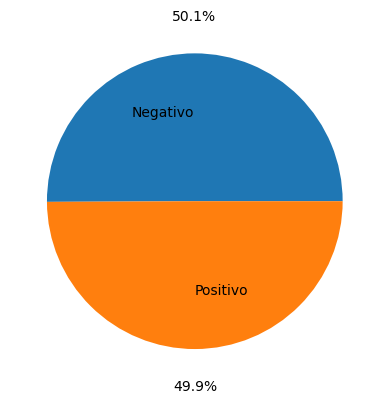

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

labels = 'Negativo','Positivo'
plt.pie(resenha.sentiment.value_counts(), labels=labels, autopct='%1.1f%%',
       pctdistance=1.25, labeldistance=.6)

print(resenha.sentiment.value_counts())

In [25]:
classificacao = resenha['sentiment'].replace(['neg','pos'],[0,1])
resenha['classificacao'] = classificacao
resenha

id                                            text_en  \
0          1  Once again Mr. Costner has dragged out a movie...   
1          2  This is an example of why the majority of acti...   
2          3  First of all I hate those moronic rappers, who...   
3          4  Not even the Beatles could write songs everyon...   
4          5  Brass pictures movies is not a fitting word fo...   
...      ...                                                ...   
49454  49456  Seeing as the vote average was pretty low, and...   
49455  49457  The plot had some wretched, unbelievable twist...   
49456  49458  I am amazed at how this movieand most others h...   
49457  49459  A Christmas Together actually came before my t...   
49458  49460  Working-class romantic drama from director Mar...   

                                                 text_pt sentiment  \
0      Mais uma vez, o Sr. Costner arrumou um filme p...       neg   
1      Este é um exemplo do motivo pelo qual a maiori...       neg   
2      Primeiro de tudo eu odeio esses raps imbecis, ...       neg   
3      Nem mesmo os Beatles puderam escrever músicas ...       neg   
4      Filmes de fotos de latão não é uma palavra apr...       neg   
...                                                  ...       ...   
49454  Como a média de votos era muito baixa, e o fat...       pos   
49455  O enredo teve algumas reviravoltas infelizes e...       pos   
49456  Estou espantado com a forma como este filme e ...       pos   
49457  A Christmas Together realmente veio antes do m...       pos   
49458  O drama romântico da classe trabalhadora do di...       pos   

       classificacao  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
...              ...  
49454              1  
49455              1  
49456              1  
49457              1  
49458              1  

[49459 rows x 5 columns]

### Bag of words

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

vetorizar = CountVectorizer(lowercase = False, max_features = 50)
bag_of_words = vetorizar.fit_transform(resenha['text_pt'])
bag_of_words.shape

(49459, 50)

In [27]:
treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words, resenha.classificacao, random_state= 42)

regressao_logistica = LogisticRegression()
regressao_logistica.fit(treino, classe_treino)
acuracia = regressao_logistica.score(teste, classe_teste)
acuracia

0.6583097452486858

In [28]:
def classificar_texto(df, coluna_texto, coluna_classificacao):

    vetorizar = CountVectorizer(lowercase = False, max_features = 50)
    bag_of_words = vetorizar.fit_transform(df[coluna_texto])
    treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words, df[coluna_classificacao], random_state= 42)
    regressao_logistica = LogisticRegression()
    regressao_logistica.fit(treino, classe_treino)
    return print('Acuracia: %.2f%%' %  (regressao_logistica.score(teste, classe_teste) * 100))

In [29]:
classificar_texto(resenha, 'text_pt', 'classificacao')

Acuracia: 65.83%


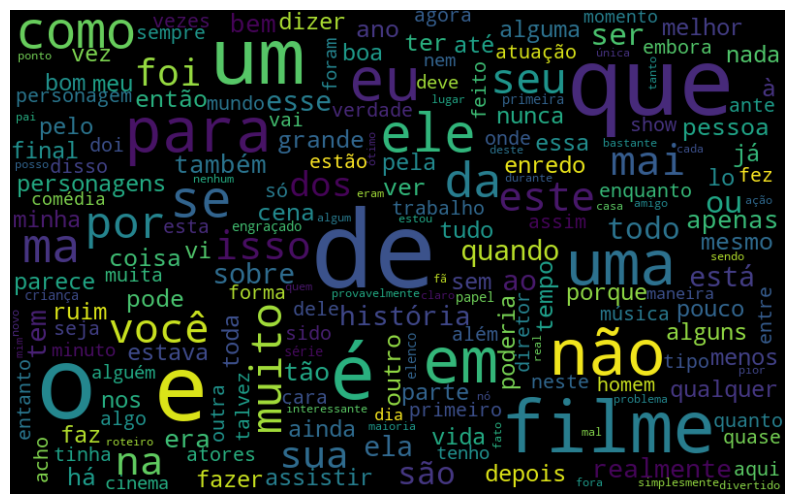

In [30]:
from wordcloud import WordCloud

todas_palavras = ' '.join([texto for texto in resenha['text_pt']])

nuvem_palavras = WordCloud(width = 800, height = 500, max_font_size = 110, collocations = False).generate(todas_palavras)

plt.figure(figsize = (10,7))
plt.imshow(nuvem_palavras, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [31]:
def nuvem_palavras(df, coluna_texo, coluna_sentimento, sentimento):
    texto = df[df[coluna_sentimento] == sentimento]
    todas_palavras = ' '.join([texto for texto in texto[coluna_texo]])

    nuvem_palavras = WordCloud(width = 800, height = 500, max_font_size = 110, collocations = False).generate(todas_palavras)

    plt.figure(figsize = (10,7))
    plt.imshow(nuvem_palavras, interpolation = 'bilinear')
    plt.axis('off')
    plt.show()

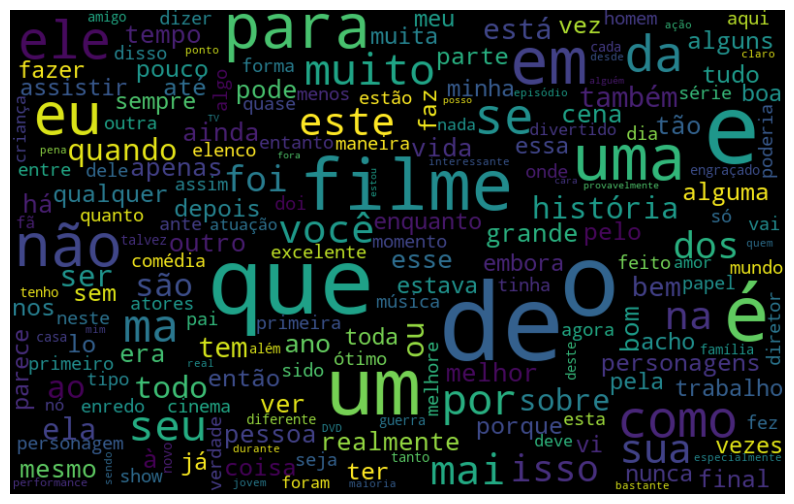

In [32]:
nuvem_palavras(resenha, "text_pt", 'sentiment', "pos")

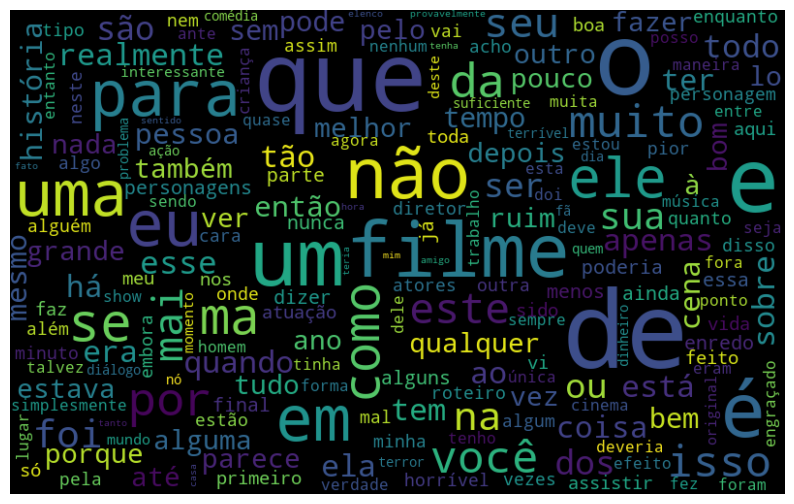

In [33]:
nuvem_palavras(resenha, "text_pt", 'sentiment', "neg")

In [34]:
import nltk

#nltk.download('all')

In [35]:
from nltk import tokenize

token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(todas_palavras)
frequencia = nltk.FreqDist(token_frase)
df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                              "Frequência": list(frequencia.values())})
df_frequencia

Palavra  Frequência
0             Mais        1538
1              uma      130888
2             vez,        1927
3                o      244881
4              Sr.        1741
...            ...         ...
348280  Muppified,           1
348281   inventora           1
348282      "Union           1
348283      beirar           1
348284    rosados.           1

[348285 rows x 2 columns]

In [36]:
df_frequencia.nlargest(columns = "Frequência", n = 10)

Palavra  Frequência
20       de      417651
14      que      325070
42        e      299743
3         o      244881
7        um      216410
102       a      210179
45        é      192381
200      em      132778
1       uma      130888
29      não      127915

In [37]:
resenha['classificacao'].max

<bound method NDFrame._add_numeric_operations.<locals>.max of 0        0
1        0
2        0
3        0
4        0
        ..
49454    1
49455    1
49456    1
49457    1
49458    1
Name: classificacao, Length: 49459, dtype: int64>

In [38]:
import seaborn as sns

def pareto(df, coluna_texto, quantidade):

    
    todas_palavras = ' '.join([texto for texto in df[coluna_texto]])
    token_espaco = tokenize.WhitespaceTokenizer()
    token_frase = token_espaco.tokenize(todas_palavras)
    frequencia = nltk.FreqDist(token_frase)
    df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                                "Frequência": list(frequencia.values())})
    df_grafico_freq = df_frequencia.nlargest(columns = "Frequência", n = quantidade)
    df_grafico_freq.loc[df_grafico_freq['Frequência'] == df_frequencia["Frequência"].max(),'cor'] = '#00CED1'
    df_grafico_freq.loc[df_grafico_freq['Frequência'] != df_frequencia["Frequência"].max(),'cor'] = '#708090'
    plt.figure(figsize = (12,8))
    ax = sns.barplot(data = df_grafico_freq, x = "Palavra", y = "Frequência", palette=  list(df_grafico_freq['cor']))
    plt.title('Contagem por palavra')
    plt.yticks([]) 
    plt.ylabel('Contagem')
    for retangulo in ax.patches:
        ax.text(retangulo.get_x() + retangulo.get_width() / 2,
                retangulo.get_height() + 22,
                '{:,}'.format(int(retangulo.get_height())).replace(',','.'), # adicionando o texto da altura
                ha = 'center')
    plt.show()

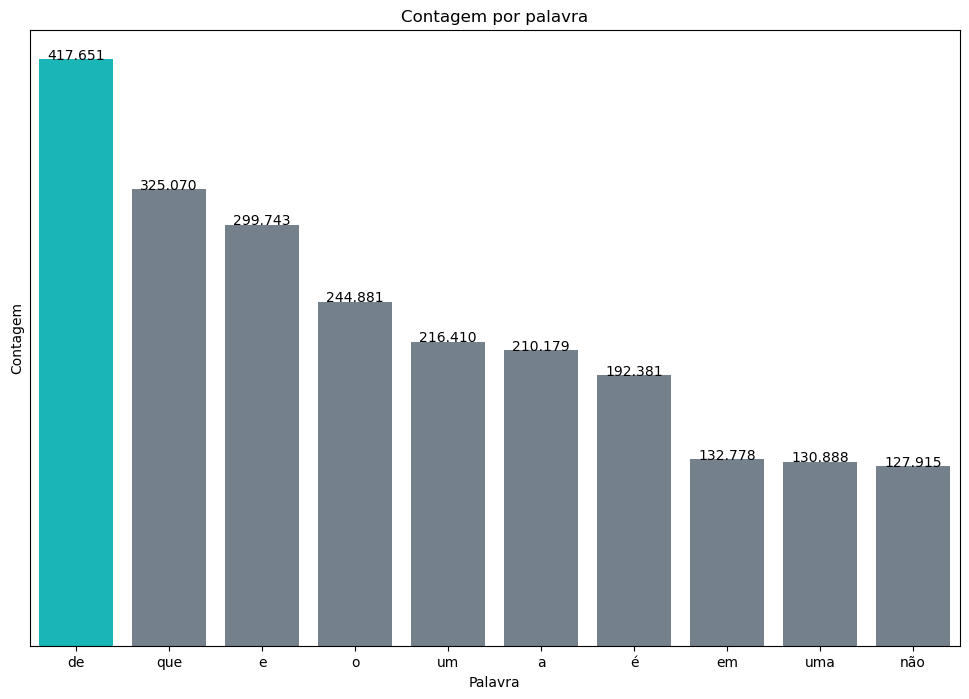

In [39]:
pareto(resenha, "text_pt", 10)

In [40]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bruno.silva\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [41]:
palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese")

frase_processada = list()
for opiniao in resenha.text_pt:
    nova_frase = list()
    palavras_texto = token_espaco.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in palavras_irrelevantes:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

resenha['tratamento_1'] = frase_processada

In [42]:
resenha.head()

id                                            text_en  \
0   1  Once again Mr. Costner has dragged out a movie...   
1   2  This is an example of why the majority of acti...   
2   3  First of all I hate those moronic rappers, who...   
3   4  Not even the Beatles could write songs everyon...   
4   5  Brass pictures movies is not a fitting word fo...   

                                             text_pt sentiment  classificacao  \
0  Mais uma vez, o Sr. Costner arrumou um filme p...       neg              0   
1  Este é um exemplo do motivo pelo qual a maiori...       neg              0   
2  Primeiro de tudo eu odeio esses raps imbecis, ...       neg              0   
3  Nem mesmo os Beatles puderam escrever músicas ...       neg              0   
4  Filmes de fotos de latão não é uma palavra apr...       neg              0   

                                        tratamento_1  
0  Mais vez, Sr. Costner arrumou filme tempo nece...  
1  Este exemplo motivo maioria filmes ação mesmos...  
2  Primeiro tudo odeio raps imbecis, poderiam agi...  
3  Nem Beatles puderam escrever músicas todos gos...  
4  Filmes fotos latão palavra apropriada eles, ve...

In [43]:
classificar_texto(resenha,'tratamento_1','classificacao')

Acuracia: 68.11%


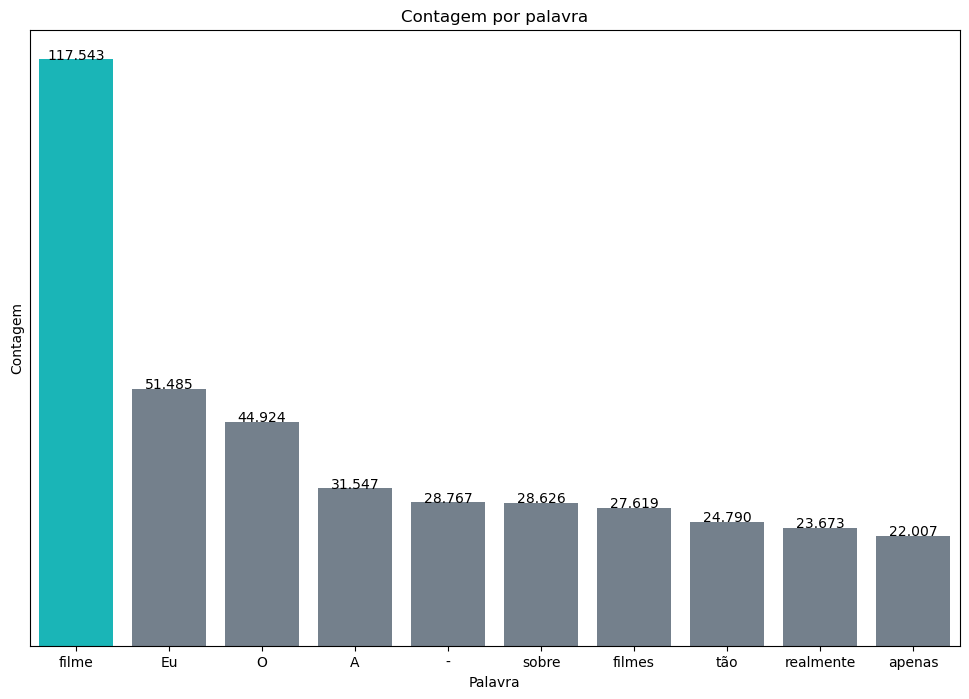

In [44]:
pareto(resenha, "tratamento_1", 10)

In [58]:
from string import punctuation

pontuacao = list()
for ponto in punctuation:
    pontuacao.append(ponto)
pontuacao_stopwords = pontuacao + palavras_irrelevantes
token_pontuacao = tokenize.WordPunctTokenizer()

In [59]:
frase_processada = list()
for opiniao in resenha['tratamento_1']:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in pontuacao_stopwords:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
resenha['tratamento_2'] = frase_processada

In [60]:
resenha.head(10)

id                                            text_en  \
0   1  Once again Mr. Costner has dragged out a movie...   
1   2  This is an example of why the majority of acti...   
2   3  First of all I hate those moronic rappers, who...   
3   4  Not even the Beatles could write songs everyon...   
4   5  Brass pictures movies is not a fitting word fo...   
5   6  A funny thing happened to me while watching "M...   
6   7  This German horror film has to be one of the w...   
7   8  Being a long-time fan of Japanese film, I expe...   
8   9  "Tokyo Eyes" tells of a 17 year old Japanese g...   
9  10  Wealthy horse ranchers in Buenos Aires have a ...   

                                             text_pt sentiment  classificacao  \
0  Mais uma vez, o Sr. Costner arrumou um filme p...       neg              0   
1  Este é um exemplo do motivo pelo qual a maiori...       neg              0   
2  Primeiro de tudo eu odeio esses raps imbecis, ...       neg              0   
3  Nem mesmo os Beatles puderam escrever músicas ...       neg              0   
4  Filmes de fotos de latão não é uma palavra apr...       neg              0   
5  Uma coisa engraçada aconteceu comigo enquanto ...       neg              0   
6  Este filme de terror alemão tem que ser um dos...       neg              0   
7  Sendo um fã de longa data do cinema japonês, e...       neg              0   
8  "Tokyo Eyes" fala de uma menina japonesa de 17...       neg              0   
9  Fazendeiros ricos em Buenos Aires têm uma long...       neg              0   

                                        tratamento_1  \
0  Mais vez, Sr. Costner arrumou filme tempo nece...   
1  Este exemplo motivo maioria filmes ação mesmos...   
2  Primeiro tudo odeio raps imbecis, poderiam agi...   
3  Nem Beatles puderam escrever músicas todos gos...   
4  Filmes fotos latão palavra apropriada eles, ve...   
5  Uma coisa engraçada aconteceu comigo enquanto ...   
6  Este filme terror alemão estranhos vi. Eu cien...   
7  Sendo fã longa data cinema japonês, esperava i...   
8  "Tokyo Eyes" fala menina japonesa 17 anos cai ...   
9  Fazendeiros ricos Buenos Aires têm longa polít...   

                                        tratamento_2  
0  Mais vez Sr Costner arrumou filme tempo necess...  
1  Este exemplo motivo maioria filmes ação mesmos...  
2  Primeiro tudo odeio raps imbecis poderiam agir...  
3  Nem Beatles puderam escrever músicas todos gos...  
4  Filmes fotos latão palavra apropriada verdade ...  
5  Uma coisa engraçada aconteceu comigo enquanto ...  
6  Este filme terror alemão estranhos vi Eu cient...  
7  Sendo fã longa data cinema japonês esperava Eu...  
8  Tokyo Eyes fala menina japonesa 17 anos cai ho...  
9  Fazendeiros ricos Buenos Aires têm longa polít...

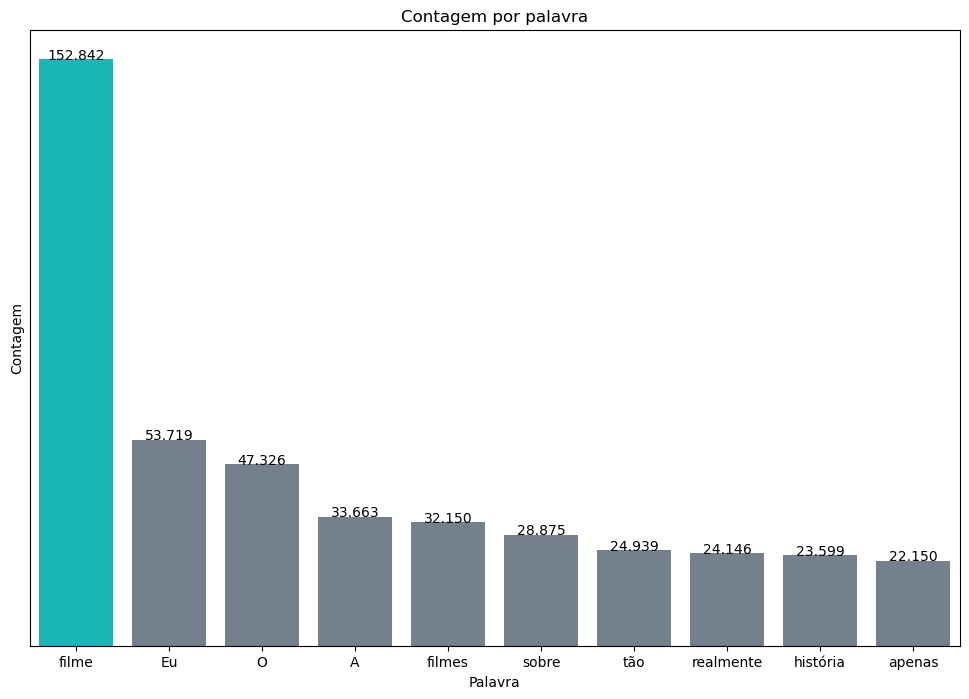

In [61]:
pareto(resenha, "tratamento_2", 10)

In [65]:
import unidecode

stopwords_sem_acento = [unidecode.unidecode(texto) for texto in pontuacao_stopwords]


In [67]:
sem_acentos = [unidecode.unidecode(texto) for texto in resenha["tratamento_2"]]
resenha['tratamento_3'] = sem_acentos

frase_processada = list()
for opiniao in resenha['tratamento_3']:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in pontuacao_stopwords:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
resenha['tratamento_3'] = frase_processada

In [68]:
acuracia_tratamento3 = classificar_texto(resenha, 'tratamento_3', 'classificacao')

Acuracia: 68.88%


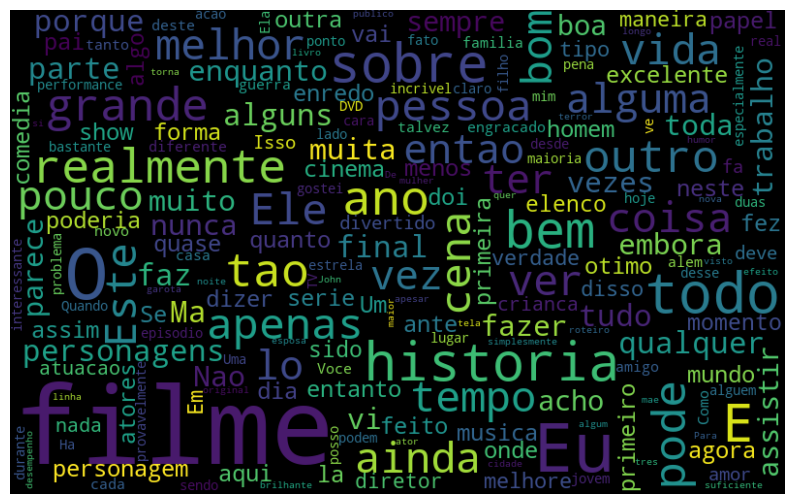

In [72]:
nuvem_palavras(resenha, 'tratamento_3', 'sentiment','pos')

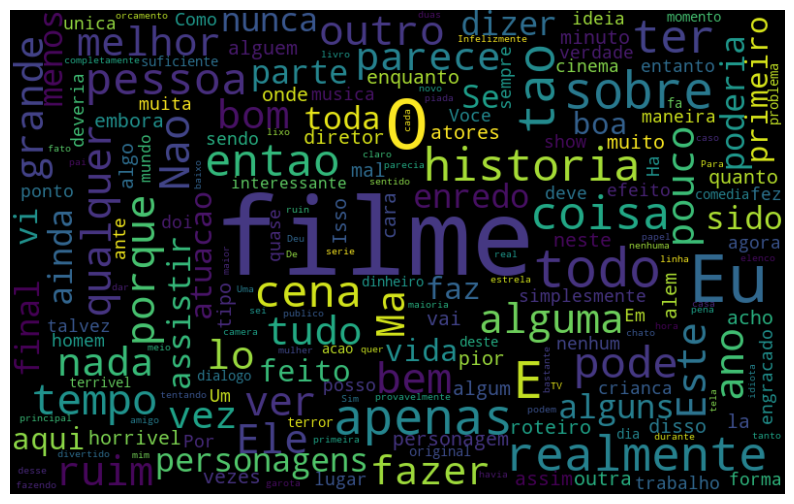

In [73]:
nuvem_palavras(resenha, 'tratamento_3', 'sentiment', 'neg')

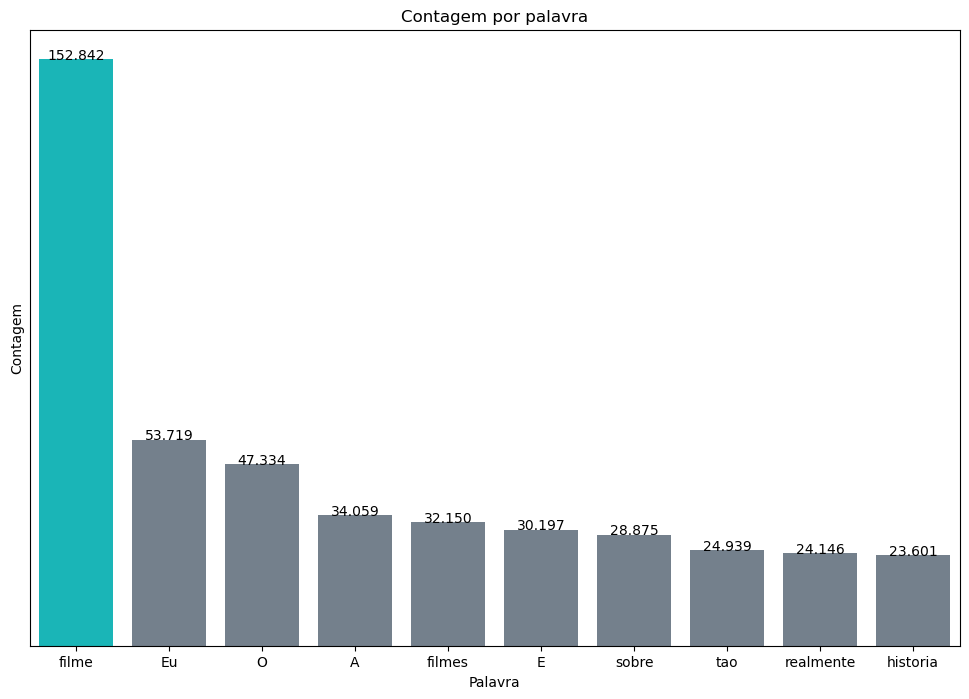

In [74]:
pareto(resenha, 'tratamento_3', 10)

In [76]:
frase_processada = list()
for opiniao in resenha['tratamento_3']:
    nova_frase = list()
    opiniao = opiniao.lower()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in stopwords_sem_acento:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
resenha['tratamento_4'] = frase_processada

In [77]:
acuracia_tratamento4 = classificar_texto(resenha, 'tratamento_4', 'classificacao')

Acuracia: 68.74%


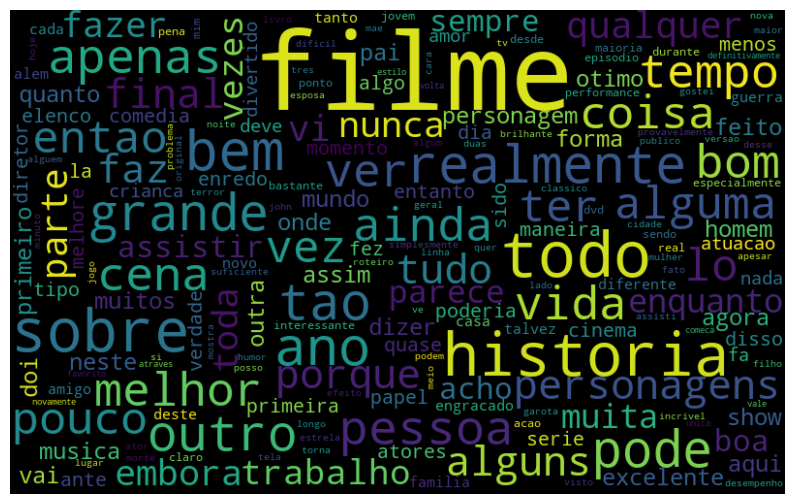

In [78]:
nuvem_palavras(resenha, 'tratamento_4', 'sentiment','pos')

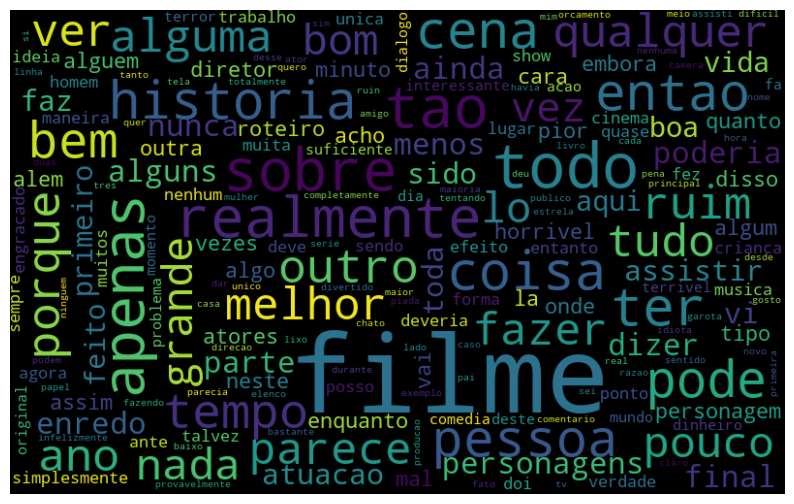

In [79]:
nuvem_palavras(resenha, 'tratamento_4', 'sentiment', 'neg')

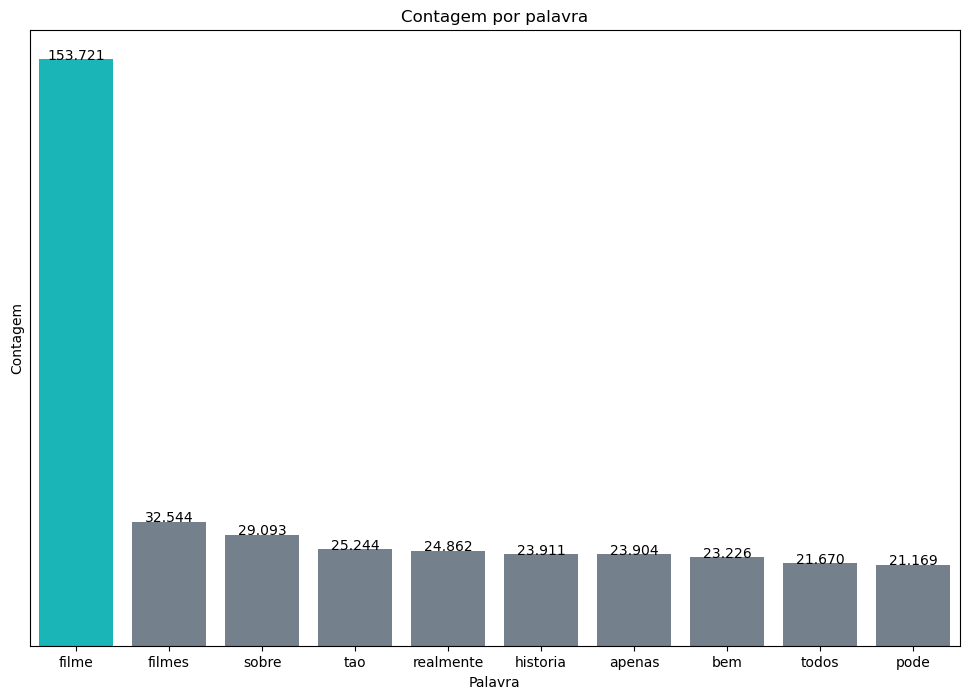

In [80]:
pareto(resenha, 'tratamento_4', 10)

In [82]:
stemmer = nltk.RSLPStemmer()

frase_processada = list()
for opiniao in resenha['tratamento_4']:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in stopwords_sem_acento:
            nova_frase.append(stemmer.stem(palavra))
    frase_processada.append(' '.join(nova_frase))
resenha['tratamento_5'] = frase_processada

In [83]:
acuracia_tratamento4 = classificar_texto(resenha, 'tratamento_5', 'classificacao')

Acuracia: 69.54%


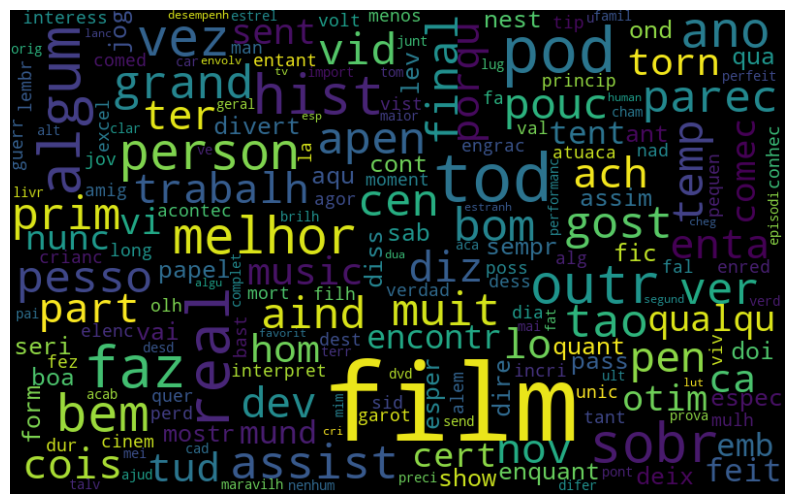

In [84]:
nuvem_palavras(resenha, 'tratamento_5', 'sentiment','pos')

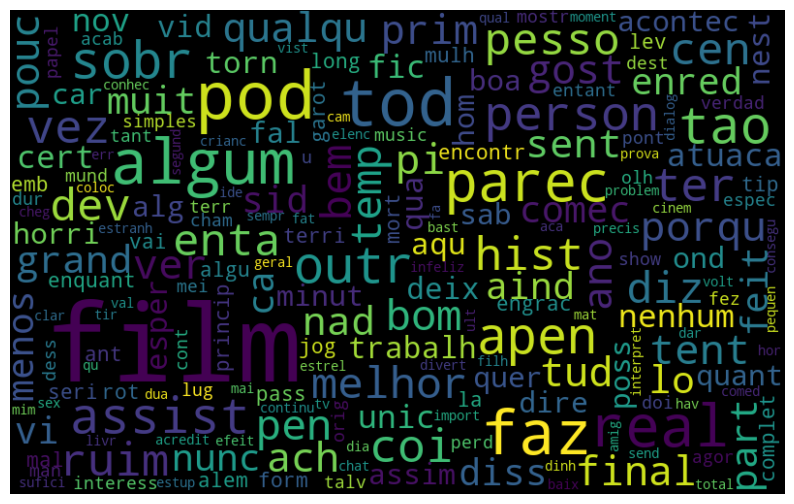

In [85]:
nuvem_palavras(resenha, 'tratamento_5', 'sentiment','neg')

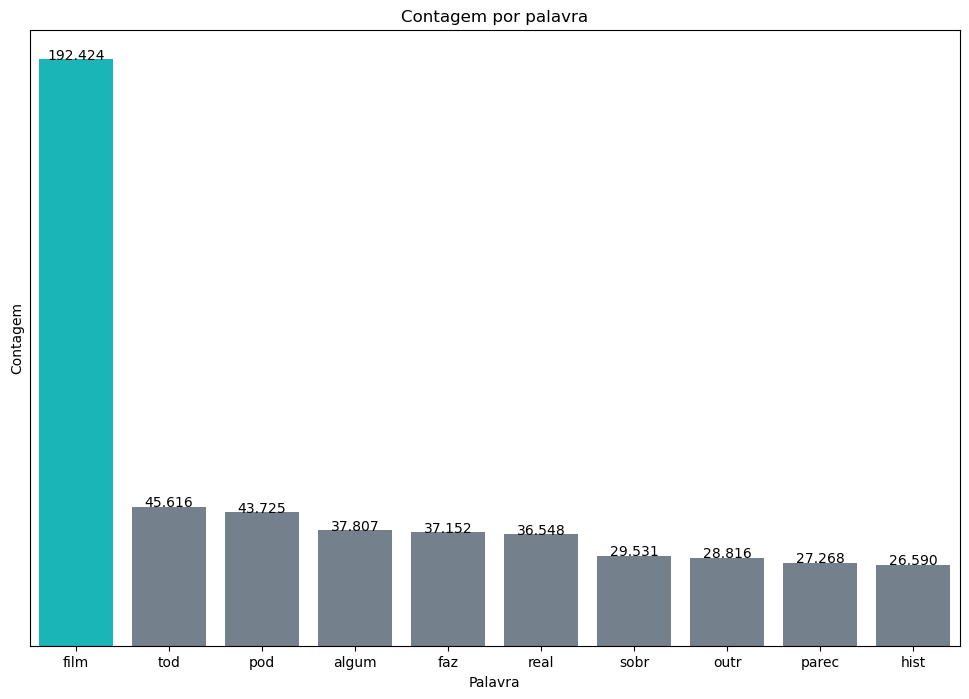

In [86]:
pareto(resenha, 'tratamento_5', 10)

In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(lowercase = False, max_features = 50)
tfidf_bruto = tfidf.fit_transform(resenha['text_pt'])
treino, teste, classe_treino, classe_teste = train_test_split(tfidf_bruto, resenha['classificacao'], random_state = 42)
regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_bruto = regressao_logistica.score(teste, classe_teste)
acuracia_tfidf_bruto

0.6600889607763849

In [91]:
tfidf = TfidfVectorizer(lowercase = False, max_features = 50)
tfidf_tratados = tfidf.fit_transform(resenha['tratamento_5'])
treino, teste, classe_treino, classe_teste = train_test_split(tfidf_tratados, resenha['classificacao'], random_state = 42)
regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_tratados = regressao_logistica.score(teste, classe_teste)
acuracia_tfidf_tratados

0.6963202587949858

In [92]:
from nltk import ngrams

tfidf = TfidfVectorizer(lowercase = False, ngram_range = (1,2))
vetor_tfidf = tfidf.fit_transform(resenha['tratamento_5'])
treino, teste, classe_treino, classe_teste = train_test_split(vetor_tfidf, resenha['classificacao'], random_state = 42)
regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_ngrams = regressao_logistica.score(teste, classe_teste)
acuracia_tfidf_ngrams

0.8856449656287909

In [94]:
pesos = pd.DataFrame(regressao_logistica.coef_[0].T,
                     index = tfidf.get_feature_names_out())

pesos.nlargest(10,0)

0
otim      9.905867
excel     9.008891
perfeit   6.899352
maravilh  6.287759
favorit   5.890861
incri     5.762412
divert    5.386778
brilh     4.857927
ador      4.575874
hoj       4.492856

In [95]:
pesos.nsmallest(10,0)

0
ruim   -11.783097
pi     -11.462572
horri   -9.725881
terri   -8.404175
nad     -7.623792
chat    -7.517420
parec   -6.881815
nenhum  -6.380789
tent    -5.955771
mal     -5.712541